# Clasificación Bayesina

In [58]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer #una función más avanzada que vectorizar así nomás
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [34]:
inmu = pd.read_excel("RetoConglomerados.xlsx")
inmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alcaldia       658 non-null    object 
 1   Colonia        658 non-null    object 
 2   X1             658 non-null    float64
 3   X2             658 non-null    float64
 4   X3             658 non-null    float64
 5   X4             658 non-null    float64
 6   X5             658 non-null    float64
 7   X6             658 non-null    float64
 8   X7             658 non-null    float64
 9   X8             658 non-null    float64
 10  X9             658 non-null    float64
 11  X10            658 non-null    float64
 12  Cocina_equip   658 non-null    object 
 13  Gimnasio       658 non-null    object 
 14  Amueblado      658 non-null    object 
 15  Alberca        658 non-null    object 
 16  Terraza        658 non-null    object 
 17  Elevador       658 non-null    object 
 18  m2_constru

In [50]:
q2 = inmu['Precio_m2'].quantile(0.5)

# Crear la nueva columna 'precio_cat' dividiendo en "Bajo" y "Alto"
inmu['precio_cat'] = pd.cut(inmu['Precio_m2'], bins=[float('-inf'), q2, float('inf')],
                            labels=[0, 1])

# Bajo = 0
# Alto = 1
inmu.head()

,Alcaldia,Colonia,X1,X2,X3,X4,X5,X6,X7,X8,...,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2,precio_cat
0,La Magdalena Contreras,San Jerónimo Líndice,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,...,0,0,1,1,150.0,2.0,3,2,6500.0,1
1,Tlahuac,Xochicalli,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,0,0,0,0,51.0,1.0,2,1,1200.0,0
2,Cuajimalpa,Bosques de las Lomas,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,...,0,0,1,1,305.0,3.0,3,3,17500.0,1
3,Tlahuac,La Turba,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,0,0,0,0,42.0,1.0,2,1,1046.4,0
4,Tlahuac,Miguel Hidalgo,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,0,0,0,0,50.0,1.0,2,1,1195.0,0


In [51]:
inmu = inmu.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\maria\AppData\Local\Temp\ipykernel_1128\3410043198.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  inmu = inmu.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [52]:
inmu.replace({"Si":1,'si':1,'no':0,"No": 0}, inplace=True)
inmu.head()

,Alcaldia,Colonia,X1,X2,X3,X4,X5,X6,X7,X8,...,Amueblado,Alberca,Terraza,Elevador,m2_construido,Baños,Recamaras,Lugares_estac,Precio_m2,precio_cat
0,La Magdalena Contreras,San Jerónimo Líndice,1.857685,5.622805,47.821312,21.693800,32.202925,4.541026,0.705162,0.167438,...,0,0,1,1,150.0,2.0,3,2,6500.0,1
1,Tlahuac,Xochicalli,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,0,0,0,0,51.0,1.0,2,1,1200.0,0
2,Cuajimalpa,Bosques de las Lomas,1.550909,5.758377,44.360119,18.897734,24.415938,4.172703,0.428650,0.061151,...,0,0,1,1,305.0,3.0,3,3,17500.0,1
3,Tlahuac,La Turba,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,0,0,0,0,42.0,1.0,2,1,1046.4,0
4,Tlahuac,Miguel Hidalgo,1.536913,4.495493,46.562121,20.048451,26.778072,5.035624,0.957675,0.096289,...,0,0,0,0,50.0,1.0,2,1,1195.0,0


In [53]:
X = inmu[["Cocina_equip", "Gimnasio", "Amueblado", "Alberca", "Terraza", "Elevador", "Baños", "Recamaras", "Lugares_estac"]]
y = inmu["precio_cat"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Clasificadores
clasificadores = {
    'Naive Bayes Multinomial': MultinomialNB(),
    'Árbol Aleatorio': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC()
}

In [56]:
# Entrenamiento y evaluación clasificadores
results = {}

for name, clf in clasificadores.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall (Sensibilidad)': recall
    }


In [57]:
# Ver los resultados de exactitud, puntaje F1, precisión y sensibilidad
print("Comparación de Métricas:")
for name, metrics in results.items():
    print(f"Clasificador: {name}")
    print(f"Exactitud: {metrics['Accuracy']:.2f}")
    print(f"Puntaje F1: {metrics['F1 Score']:.2f}")
    print(f"Precisión: {metrics['Precision']:.2f}")
    print(f"Sensibilidad (Recall): {metrics['Recall (Sensibilidad)']:.2f}")
    print("\n")

Comparación de Métricas:
Clasificador: Naive Bayes Multinomial
Exactitud: 0.82
Puntaje F1: 0.83
Precisión: 0.94
Sensibilidad (Recall): 0.74


Clasificador: Árbol Aleatorio
Exactitud: 0.89
Puntaje F1: 0.90
Precisión: 0.93
Sensibilidad (Recall): 0.87


Clasificador: SVM
Exactitud: 0.90
Puntaje F1: 0.92
Precisión: 0.93
Sensibilidad (Recall): 0.90




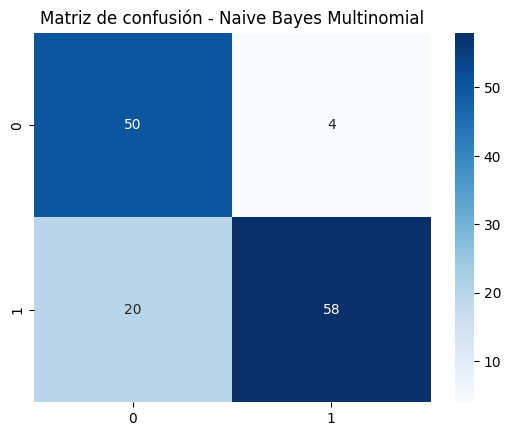

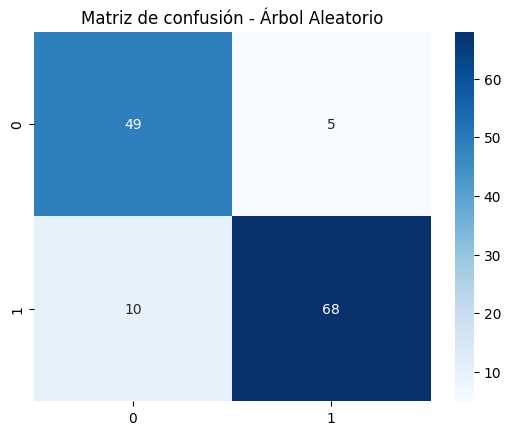

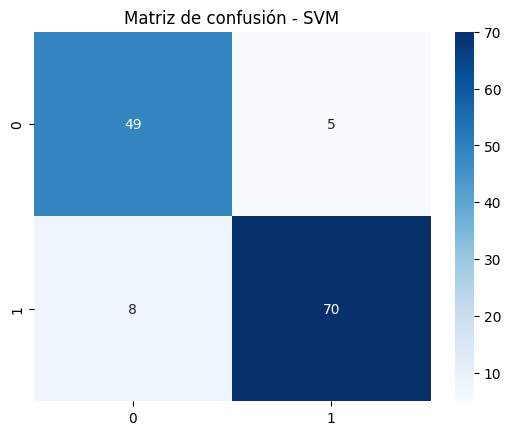

In [59]:
#Matriz de Confusión
clasificadores = {
    'Naive Bayes Multinomial': MultinomialNB(),
    'Árbol Aleatorio': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC()
}

for name, clf in clasificadores.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de confusión - {name}')
    plt.show()

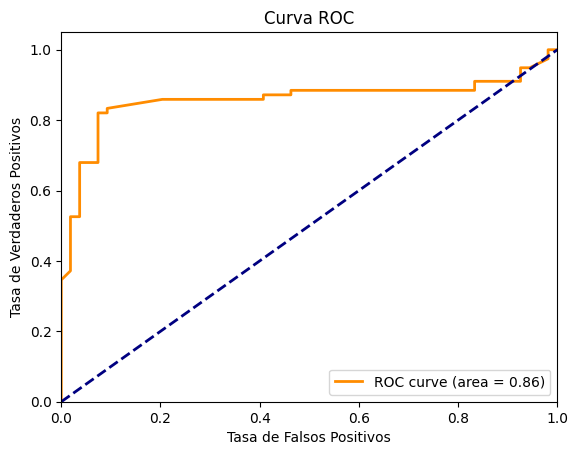

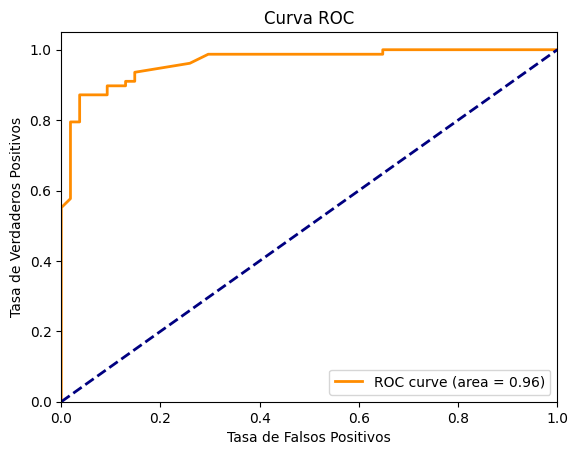

AttributeError: predict_proba is not available when probability=False

In [60]:
#ROC
results = {}

for name, clf in clasificadores.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    auc = roc_auc_score(y_test, y_prob)
    
    results[name] = {
        'ROC Curve': (fpr, tpr),
        'AUC': auc
    }
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()


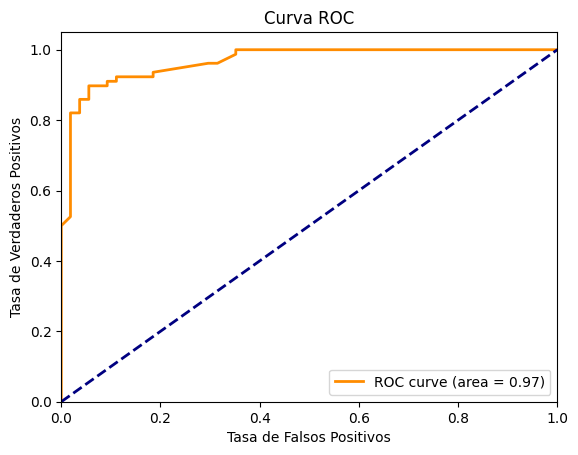

In [61]:
clf = SVC(probability=True) 
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
